Boston price 예측모델
- 데이터셋 : boston.csv
- 학습종류: 지도학습 / 회귀
- 알고리즘 : Ridge, Lasso, Elastine
- 피처: 모두.
- 타겟: medv   

In [195]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split, KFold
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
                                                    ## 교차검증

In [196]:
col = 'crim	zn	indus	chas	nox	rm	age	dis	rad	tax	ptratio	b	lstat	medv'.split()
len(col)
houseDict = {x:[] for x in col}
houseDF = pd.DataFrame(pd.read_csv('../data/housing.csv', header=None))
for i in houseDF.index:
    for j in range(14):
        houseDict[col[j]].append(houseDF.iloc[i,:][0].split()[j])
houDF = pd.DataFrame(houseDict)
houDF = houDF.astype(float)


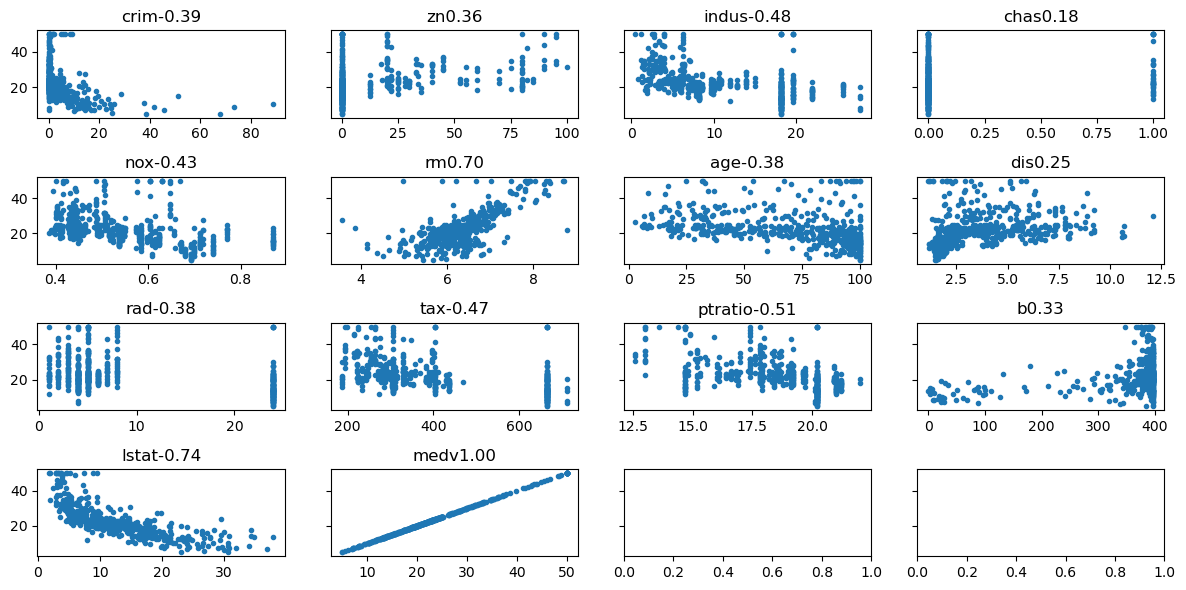

In [197]:
fig, ax = plt.subplots(4,4, sharey=True,figsize = (12,6))
ax = ax.flatten()
# print(ax[0])
for i in range(0,14):
    ax[i].plot(houDF.iloc[:,i],houDF['medv'], '.')
    ax[i].set_title(houDF.columns[i]+ str(f"{houDF.iloc[:,i].corr(houDF['medv']):.2f}"))

plt.tight_layout()
plt.show()    


In [198]:
houDF = pd.DataFrame(houseDict)
houDF = houDF.astype(float)
houDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


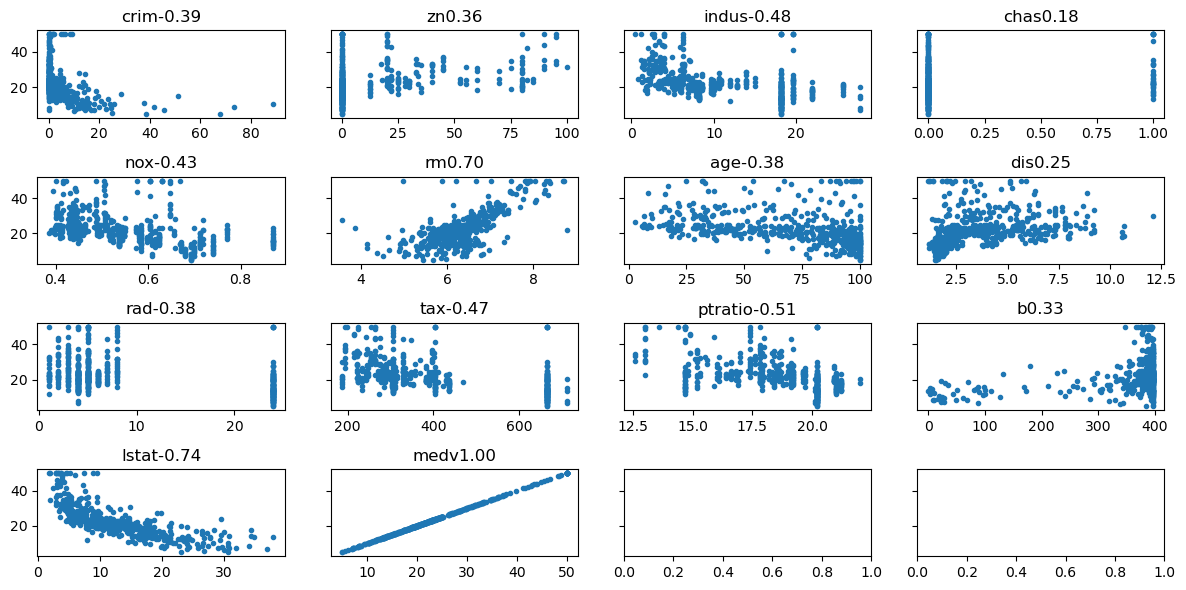

In [199]:
fig, ax = plt.subplots(4,4, sharey=True,figsize = (12,6))
ax = ax.flatten()
# print(ax[0])
for i in range(0,14):
    ax[i].plot(houDF.iloc[:,i],houDF['medv'], '.')
    ax[i].set_title(houDF.columns[i]+ str(f"{houDF.iloc[:,i].corr(houDF['medv']):.2f}"))

plt.tight_layout()
plt.show()    


In [200]:
nowDF = houDF.copy()

In [201]:
# 전처리 필요. nowDF 기준으로 수정,
# boxplot로 이상치 제거후, minmax or standard로 정규화

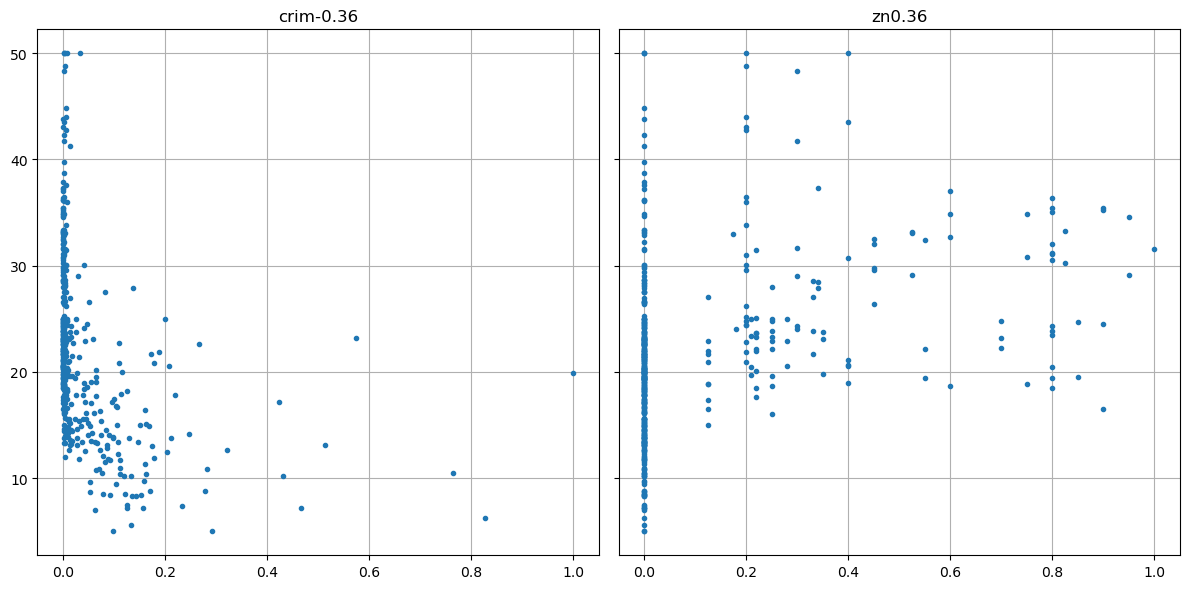

In [226]:
fig, ax = plt.subplots(1,2, sharey=True,figsize = (12,6))
ax = ax.flatten()
# print(ax[0])
for i in range(0,2):
    ax[i].plot(nowDF.iloc[:,i],nowDF['medv'], '.')
    ax[i].set_title(nowDF.columns[i]+ str(f"{nowDF.iloc[:,i].corr(nowDF['medv']):.2f}"))
    ax[i].grid()

plt.tight_layout()
plt.show()    

In [203]:
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['rm']<8) & (nowDF['medv']>45)].index)
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['rm']<4) & (nowDF['medv']<30)].index)
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['rm']>8) & (nowDF['medv']<30)].index)
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['lstat']>25) & (nowDF['medv']>20)].index)
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['lstat']<5) & (nowDF['medv']<15)].index)
nowDF = nowDF.drop(index=nowDF.loc[(nowDF['lstat']<8) & (nowDF['medv']<15)].index)

In [204]:
# # 506개
# nowDF= nowDF.drop(nowDF.loc[(nowDF['rm']>7.5),:].index)
# nowDF= nowDF.drop(nowDF.loc[(nowDF['rm']<4.9),:].index)
# nowDF= nowDF.drop(nowDF.loc[(nowDF['lstat']>31),:].index)
# # 이상치 제거.

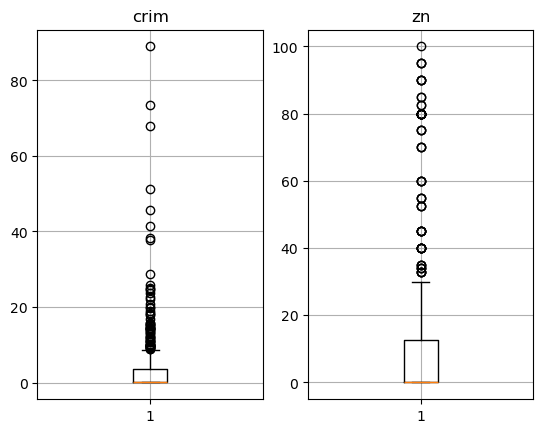

In [205]:
labels = nowDF.columns[:2]
colors = ['peachpuff', 'orange']

fig, axe = plt.subplots(1,2)
axe = axe.flatten()
# fill with colors
for ax, col in zip(axe, nowDF.columns[:2]):
    ax.boxplot(nowDF[[col]])
    ax.grid()
    ax.set_title(col)
plt.show()

In [206]:
saveDF = nowDF.copy()

In [207]:
nowDF.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [208]:
from sklearn.preprocessing import MinMaxScaler
#값의 범위가 다르므로 정규화
array = nowDF[nowDF.columns[:-1]].to_numpy()
minmax = MinMaxScaler()
narr = minmax.fit_transform(array)
nowDF[nowDF.columns[:-1]] = pd.DataFrame(narr)

In [209]:
nowDF = nowDF.dropna()

In [210]:
nowDF.columns[:-1].ndim

1

In [211]:
featureDF = nowDF[nowDF.columns[:-1]]
targetSR = nowDF['medv']

print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [212]:
## 학습용 : 테스트용 = 9:1
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape}, / y_test => {y_test.ndim}D, {y_test.shape}")

X_train => 2D (350, 13) / X_test => 2D, (117, 13)
y_train => 1D (350,), / y_test => 1D, (117,)


### 4 학습진행

In [213]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [214]:
## 교차검증 객체 생성 5개 분할 - default
kf = KFold()

## 선형회귀모델 객체 생성성
rid = Ridge()
las = Lasso()
ela = ElasticNet()


# kf.get_n_splits(X_train, y_train)

Ridge 모델

In [215]:
resultDF = pd.DataFrame(columns = ['alpha','train_score', 'test_score','diff', 'train_loss', 'test_loss'])

## alpha값에 따른 Ridge 모델 성능 비교
for alpha in [0.1, 1.0, 2, 5, 10, 50, 100]:
    lr = Ridge(alpha)
    
    train_stotal , test_stotal = 0, 0
    train_ltotal, test_ltotal = 0, 0
    
        
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        # print(f"Fold {i}")
    # print(test_index in y_test.index)
        ## 학습용 / 테스트용 피쳐와 타겟 추출
        train_data, train_label = X_train.iloc[train_index, 1:], y_train.iloc[train_index]
        test_data, test_label = X_train.iloc[test_index, 1:], y_train.iloc[test_index]
        # print(train_data.columns)

        #학습
        lr.fit(train_data, train_label)
        
        train_score = lr.score(train_data, train_label)
        test_score = lr.score(test_data, test_label)

        train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
        test_loss = root_mean_squared_error(test_label, lr.predict(test_data))

        train_stotal += train_score
        test_stotal += test_score
        train_ltotal += train_loss
        test_ltotal += test_loss
    #alpha값 별로 성능과 손실값 평균 저장하기    
    resultDF.loc[alpha] = [alpha, train_stotal/5,test_stotal/5,train_stotal/5-test_stotal/5,train_ltotal/5,test_ltotal/5]


In [216]:
resultDF

,alpha,train_score,test_score,diff,train_loss,test_loss
0.1,0.1,0.502813,0.451467,0.051347,5.743912,5.986214
1.0,1.0,0.499398,0.456041,0.043357,5.763630,5.961639
2.0,2.0,0.494260,0.455790,0.038470,5.793147,5.963008
5.0,5.0,0.479916,0.449060,0.030856,5.874747,5.999773
10.0,10.0,0.460746,0.435665,0.025081,5.982044,6.073039
50.0,50.0,0.377165,0.361908,0.015257,6.429105,6.468755
100.0,100.0,0.313510,0.300617,0.012892,6.750009,6.779702


Text(0.5, 0.98, 'Ridge')

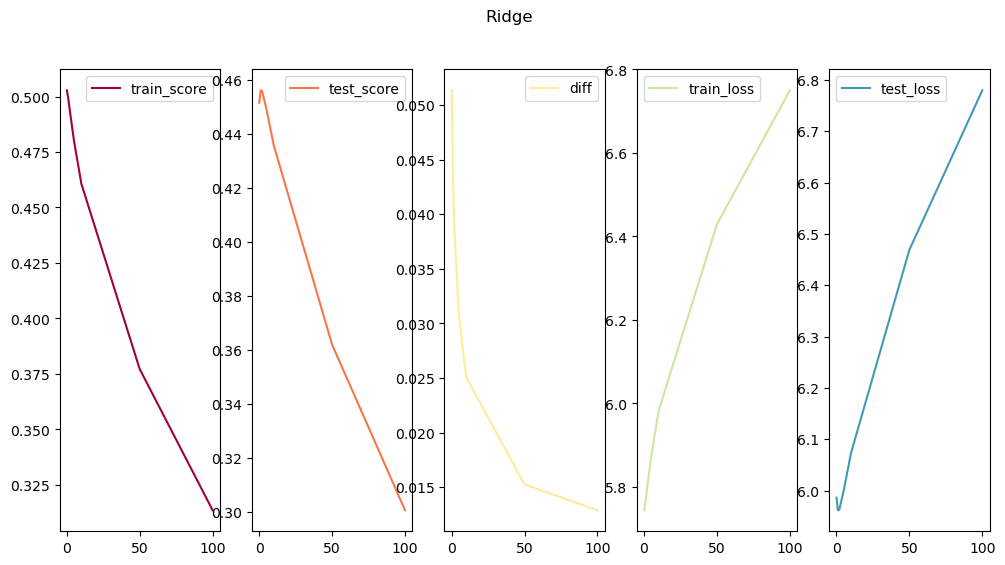

In [217]:
fig, axe = plt.subplots(1,5, figsize=(12,6), sharex=True)
axe = axe.flatten()
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 5, 24)]
for ax, col, color1 in zip(axe, resultDF.columns[1:], colors):
    ax.plot(resultDF['alpha'], resultDF[col], color = color1, label=col)
    ax.legend()

fig.suptitle('Ridge')

In [218]:
resultDF = pd.DataFrame(columns = ['alpha','train_score', 'test_score','diff', 'train_loss', 'test_loss'])

## alpha값에 따른 Ridge 모델 성능 비교
for alpha in [0.1, 0.3, 0.5, 0.7, 1.0,1.25, 1.5]:
    lr = Lasso(alpha)
    
    train_stotal , test_stotal = 0, 0
    train_ltotal, test_ltotal = 0, 0
    
        
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        # print(f"Fold {i}")
    # print(test_index in y_test.index)
        ## 학습용 / 테스트용 피쳐와 타겟 추출
        train_data, train_label = X_train.iloc[train_index, 1:], y_train.iloc[train_index]
        test_data, test_label = X_train.iloc[test_index, 1:], y_train.iloc[test_index]
        # print(train_data.columns)

        #학습
        lr.fit(train_data, train_label)
        
        train_score = lr.score(train_data, train_label)
        test_score = lr.score(test_data, test_label)

        train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
        test_loss = root_mean_squared_error(test_label, lr.predict(test_data))

        train_stotal += train_score
        test_stotal += test_score
        train_ltotal += train_loss
        test_ltotal += test_loss
    #alpha값 별로 성능과 손실값 평균 저장하기    
    resultDF.loc[alpha] = [alpha, train_stotal/5,test_stotal/5,train_stotal/5-test_stotal/5,train_ltotal/5,test_ltotal/5]


In [219]:
resultDF

,alpha,train_score,test_score,diff,train_loss,test_loss
0.10,0.10,0.471546,0.441971,0.029575,5.921951,6.040743
0.30,0.30,0.416148,0.394505,0.021643,6.224422,6.300407
0.50,0.50,0.327004,0.300474,0.026530,6.682456,6.780959
0.70,0.70,0.231027,0.214253,0.016774,7.144033,7.189958
1.00,1.00,0.149725,0.133478,0.016247,7.512097,7.555871
1.25,1.25,0.067283,0.050627,0.016656,7.867866,7.911124
1.50,1.50,0.009725,-0.002711,0.012436,8.107848,8.131241


Text(0.5, 0.98, 'lasso')

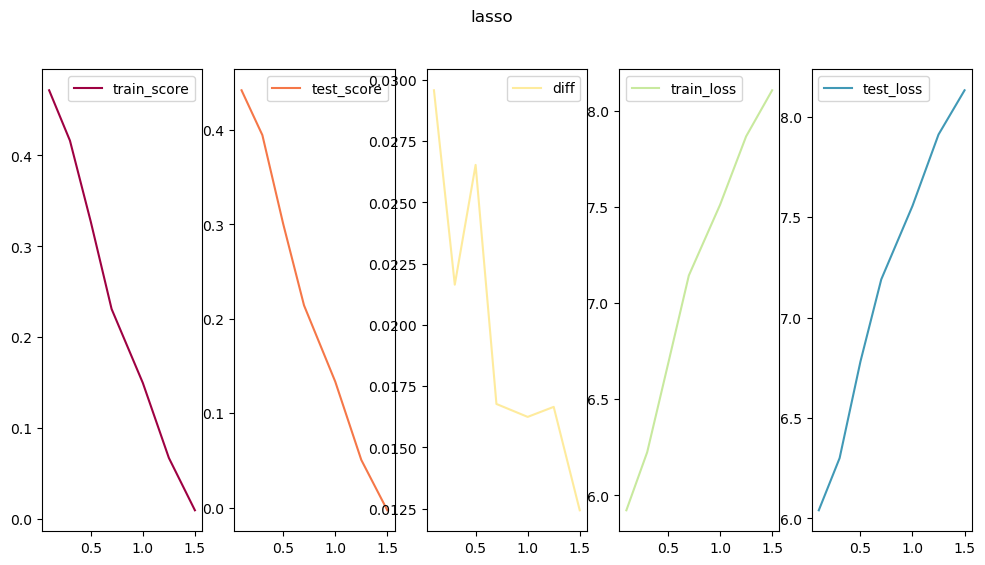

In [220]:
fig, axe = plt.subplots(1,5, figsize=(12,6), sharex=True)
axe = axe.flatten()
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 5, 24)]
for ax, col, color1 in zip(axe, resultDF.columns[1:], colors):
    ax.plot(resultDF['alpha'], resultDF[col], color = color1, label=col)
    ax.legend()
fig.suptitle('lasso')

In [221]:
resultDF = pd.DataFrame(columns = ['alpha','train_score', 'test_score','diff', 'train_loss', 'test_loss'])

## alpha값에 따른 Ridge 모델 성능 비교
for alpha in [0.1, 0.5, 1.0, 1.25, 1.5, 1.75, 2, 3]:
    lr = ElasticNet(alpha)
    
    train_stotal , test_stotal = 0, 0
    train_ltotal, test_ltotal = 0, 0
    
        
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        # print(f"Fold {i}")
    # print(test_index in y_test.index)
        ## 학습용 / 테스트용 피쳐와 타겟 추출
        train_data, train_label = X_train.iloc[train_index, 1:], y_train.iloc[train_index]
        test_data, test_label = X_train.iloc[test_index, 1:], y_train.iloc[test_index]
        # print(train_data.columns)

        #학습
        lr.fit(train_data, train_label)
        
        train_score = lr.score(train_data, train_label)
        test_score = lr.score(test_data, test_label)

        train_loss = root_mean_squared_error(train_label, lr.predict(train_data))
        test_loss = root_mean_squared_error(test_label, lr.predict(test_data))

        train_stotal += train_score
        test_stotal += test_score
        train_ltotal += train_loss
        test_ltotal += test_loss
    #alpha값 별로 성능과 손실값 평균 저장하기    
    resultDF.loc[alpha] = [alpha, train_stotal/5,test_stotal/5,train_stotal/5-test_stotal/5,train_ltotal/5,test_ltotal/5]


In [222]:
resultDF

,alpha,train_score,test_score,diff,train_loss,test_loss
0.10,0.10,0.435068,0.412702,0.022366,6.122777,6.198414
0.50,0.50,0.284258,0.270747,0.013510,6.892268,6.925755
1.00,1.00,0.158090,0.145722,0.012369,7.475679,7.502229
1.25,1.25,0.112320,0.100395,0.011926,7.676417,7.699793
1.50,1.50,0.076484,0.064912,0.011572,7.830029,7.850726
1.75,1.75,0.049404,0.038438,0.010965,7.944170,7.961304
2.00,2.00,0.031811,0.021363,0.010448,8.017498,8.031728
3.00,3.00,0.000997,-0.008357,0.009354,8.144334,8.152831


Text(0.5, 0.98, 'ElasticNet')

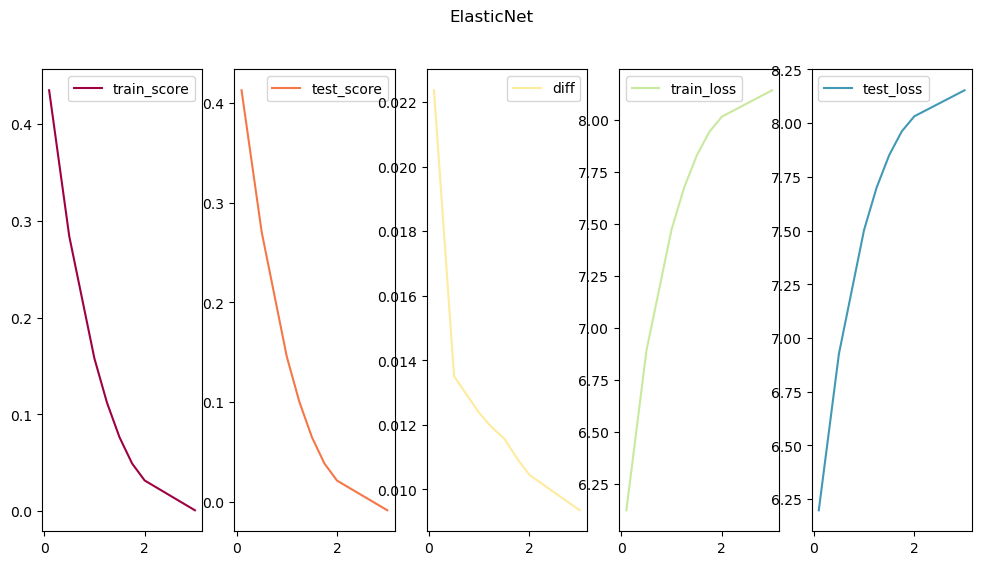

In [223]:
fig, axe = plt.subplots(1,5, figsize=(12,6), sharex=True)
axe = axe.flatten()
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 5, 24)]
for ax, col, color1 in zip(axe, resultDF.columns[1:], colors):
    ax.plot(resultDF['alpha'], resultDF[col], color = color1, label=col)
    ax.legend()
    
fig.suptitle('ElasticNet')

In [224]:
nowDF

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.058148,0.0,0.314815,0.531284,0.641607,0.268711,0.000000,0.208015,0.287234,1.000000,0.083356,24.0
1,0.000236,0.00,0.234444,0.0,0.172840,0.497711,0.782698,0.348524,0.043478,0.104962,0.553191,1.000000,0.198944,21.6
2,0.000236,0.00,0.234444,0.0,0.172840,0.664269,0.599382,0.348524,0.043478,0.104962,0.553191,0.989737,0.056960,34.7
3,0.000293,0.00,0.053333,0.0,0.150206,0.623501,0.441813,0.448173,0.086957,0.066794,0.648936,0.994276,0.026674,33.4
4,0.000705,0.00,0.053333,0.0,0.150206,0.655984,0.528321,0.448173,0.086957,0.066794,0.648936,1.000000,0.093081,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.002451,0.00,0.331481,0.0,0.411523,0.411816,0.790937,0.123864,0.217391,0.389313,0.702128,1.000000,0.343151,23.7
482,0.000633,0.00,0.414444,0.0,0.386831,0.535208,0.681771,0.122080,0.000000,0.164122,0.893617,0.987619,0.213670,25.0
483,0.000438,0.00,0.414444,0.0,0.386831,0.432091,0.760041,0.104691,0.000000,0.164122,0.893617,1.000000,0.197277,21.8
484,0.000612,0.00,0.414444,0.0,0.386831,0.618705,0.907312,0.093771,0.000000,0.164122,0.893617,1.000000,0.101695,20.6


In [225]:
print(resultDF)

      alpha  train_score  test_score      diff  train_loss  test_loss
0.10   0.10     0.435068    0.412702  0.022366    6.122777   6.198414
0.50   0.50     0.284258    0.270747  0.013510    6.892268   6.925755
1.00   1.00     0.158090    0.145722  0.012369    7.475679   7.502229
1.25   1.25     0.112320    0.100395  0.011926    7.676417   7.699793
1.50   1.50     0.076484    0.064912  0.011572    7.830029   7.850726
1.75   1.75     0.049404    0.038438  0.010965    7.944170   7.961304
2.00   2.00     0.031811    0.021363  0.010448    8.017498   8.031728
3.00   3.00     0.000997   -0.008357  0.009354    8.144334   8.152831
